In [3]:
import pandas as pd
import numpy as np
import matplotlib .pyplot as plt
import seaborn as sns


In [4]:
train = pd.read_csv('/home/carlos/Documents/8vo/FINAL_SISTEMAS_DISTRIBUIDOS /FL/FINAL/simple-fl/examples/Heart_Disease/train/heart_statlog_cleveland_hungary_final.csv')
train.head(5)

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


Columna	Descripción	Tipo
1. age	Edad del paciente	Numérico
2. sex	1 = hombre, 0 = mujer	Binario
3. cp	Tipo de dolor de pecho (0–3)	Categórico
4. trestbps	Presión arterial en reposo (mmHg)	Numérico
5. chol	Colesterol sérico (mg/dL)	Numérico
6. fbs	Glucosa en ayuno > 120 mg/dL (1 = sí, 0 = no)	Binario
7. restecg	Resultados del ECG en reposo (0–2)	Categórico
8. thalach	Frecuencia cardíaca máxima alcanzada	Numérico
9. exang	Angina inducida por ejercicio (1 = sí, 0 = no)	Binario
10. oldpeak	Depresión del ST inducida por ejercicio	Numérico
11. slope	Pendiente del segmento ST (0–2)	Categórico
12. (Target) target	1 = enfermedad cardíaca, 0 = sano	Binario

In [5]:
train.describe()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
count,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000
mean,53.720168,0.763866,3.232773,132.153782,210.363866,0.213445,0.698319,139.732773,0.387395,0.922773,1.624370,0.528571
std,9.358203,0.424884,0.935480,18.368823,101.420489,0.409912,0.870359,25.517636,0.487360,1.086337,0.610459,0.499393
min,28.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000
25%,47.000000,1.000000,3.000000,120.000000,188.000000,0.000000,0.000000,121.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,4.000000,130.000000,229.000000,0.000000,0.000000,140.500000,0.000000,0.600000,2.000000,1.000000
75%,60.000000,1.000000,4.000000,140.000000,269.750000,0.000000,2.000000,160.000000,1.000000,1.600000,2.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,1.000000


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  1190 non-null   int64  
 1   sex                  1190 non-null   int64  
 2   chest pain type      1190 non-null   int64  
 3   resting bp s         1190 non-null   int64  
 4   cholesterol          1190 non-null   int64  
 5   fasting blood sugar  1190 non-null   int64  
 6   resting ecg          1190 non-null   int64  
 7   max heart rate       1190 non-null   int64  
 8   exercise angina      1190 non-null   int64  
 9   oldpeak              1190 non-null   float64
 10  ST slope             1190 non-null   int64  
 11  target               1190 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 111.7 KB


In [7]:
train.isnull().sum()

age                    0
sex                    0
chest pain type        0
resting bp s           0
cholesterol            0
fasting blood sugar    0
resting ecg            0
max heart rate         0
exercise angina        0
oldpeak                0
ST slope               0
target                 0
dtype: int64

### En este casó se pdoria producir diabetes que es un calro indicador de la enfermedad cardiovascular


In [8]:
def diabetes_flag(row):
    if row["fasting blood sugar"] == 1 or row["cholesterol"] > 240:
        return 1  
    else:
        return 0

train["diabetes"] = train.apply(diabetes_flag, axis=1)


In [9]:
train.nunique()

age                     50
sex                      2
chest pain type          4
resting bp s            67
cholesterol            222
fasting blood sugar      2
resting ecg              3
max heart rate         119
exercise angina          2
oldpeak                 53
ST slope                 4
target                   2
diabetes                 2
dtype: int64

In [10]:
scale_cols = ['resting bp s', 'cholesterol']
for c in scale_cols:
    min_val = train[c].min()
    max_val = train[c].max()
    train[c+"_scaled"] = (train[c] - min_val) / (max_val - min_val)


In [11]:
train.columns = train.columns.str.strip()
train = pd.get_dummies(
    train,
    columns=["sex", "chest pain type", "fasting blood sugar", "resting ecg", "exercise angina", "ST slope"],
    drop_first=True
)
train = train.astype(int)



In [12]:
train = train.drop("resting bp s", axis=1)
train = train.drop("cholesterol", axis=1)


<Axes: xlabel='target', ylabel='count'>

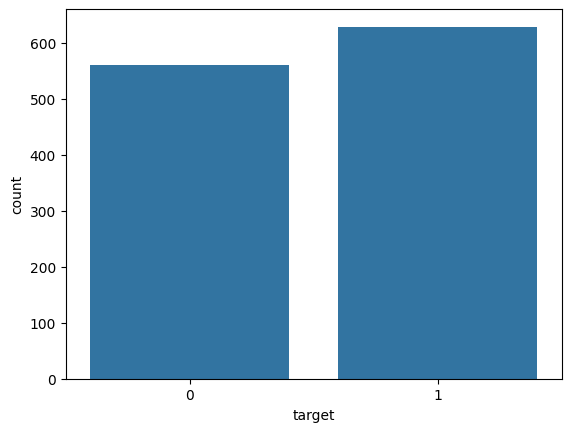

In [14]:
#observar clases desbalaceadas
sns.countplot(x='target', data=train)

In [13]:
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

2025-11-07 09:20:43.660726: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [85]:
X = train.drop('target', axis=1)
columns = X.columns.tolist()
y = train['target']

In [101]:
def build_model(input_dim, seed=42):
    keras.utils.set_random_seed(seed)
    model = keras.Sequential([
        layers.Input(shape=(input_dim,)),
        layers.Dense(128, activation="relu"),
        layers.Dropout(0.5),
        layers.Dense(64, activation="relu"),
        layers.Dense(1, activation="sigmoid")  # <-- units=1
    ])
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=1e-3),
        loss="binary_crossentropy",
        metrics=[keras.metrics.AUC(name="AUC")]
    )
    return model


In [105]:
num_folds = 6
RAND_VAL = 42

In [106]:
folds = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=RAND_VAL)
auc_vals = []

for fold, (train_idx, val_idx) in enumerate(folds.split(X, y)):
    print(f"Training fold {fold + 1}...")

    X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
    y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]

    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_val = scaler.transform(X_val)

    model = build_model(input_dim=X_train.shape[1], seed=RAND_VAL + fold)

    early_stopping = keras.callbacks.EarlyStopping(
        monitor="val_loss",
        patience=10,
        restore_best_weights=True
    )

    model.fit(
        X_train, y_train,
        validation_data=(X_val, y_val),
        epochs=100,
        batch_size=32,
        callbacks=[early_stopping],
        verbose=0
    )

    y_val_pred = model.predict(X_val, verbose=0).ravel()
    auc = roc_auc_score(y_val, y_val_pred)
    auc_vals.append(auc)
    print(f"Fold {fold + 1} AUC: {auc:.4f}")

print(f"\nMean AUC: {np.mean(auc_vals):.4f} ± {np.std(auc_vals):.4f}")


Training fold 1...
Fold 1 AUC: 0.9091
Training fold 2...
Fold 2 AUC: 0.9228
Training fold 3...
Fold 3 AUC: 0.9477
Training fold 4...
Fold 4 AUC: 0.9215
Training fold 5...
Fold 5 AUC: 0.9353
Training fold 6...
Fold 6 AUC: 0.9308

Mean AUC: 0.9279 ± 0.0121


### Vamos a preparar el dataset para FEDERAL LEARNING 

In [1]:
import os,shutil,pathlib


In [2]:
original_dir = pathlib.Path("train")
new_base_dir = pathlib.Path("new_base_dir")
new_base_dir_2 = pathlib.Path("new_base_dir_2")

In [21]:
# split_from_single_csv_small.py
import pathlib, pandas as pd
from sklearn.model_selection import train_test_split
import sys
import glob

# --- Ruta que pegaste (nota: había un espacio en tu mensaje original) ---
csv_path = pathlib.Path("/home/carlos/Documents/8vo/FINAL_SISTEMAS_DISTRIBUIDOS/FL/FINAL/simple-fl/examples/Heart_Disease/train/heart_statlog_cleveland_hungary_final.csv")

# Si la ruta no existe, intenta una corrección común (quitar espacio)
if not csv_path.exists():
    alt = pathlib.Path(str(csv_path).replace("DISTRIBUIDOS /FL", "DISTRIBUIDOS/FL"))
    if alt.exists():
        print("Archivo no encontrado en la ruta original. Usando ruta corregida:")
        print(" ->", alt)
        csv_path = alt
    else:
        # intenta buscar por nombre de archivo en el árbol desde Documents
        matches = list(pathlib.Path.home().glob("**/heart_statlog_cleveland_hungary_final.csv"))
        if matches:
            print("Archivo encontrado en otra ruta. Usando:", matches[0])
            csv_path = matches[0]
        else:
            print("ERROR: No se encontró el CSV.")
            print("Verifica la ruta. Ejemplo corregido sugerido:")
            print("  /home/carlos/Documents/8vo/FINAL_SISTEMAS_DISTRIBUIDOS/FL/FINAL/simple-fl/examples/Heart_Disease/train/heart_statlog_cleveland_hungary_final.csv")
            sys.exit(1)

# --- parámetros pequeños ---
out1 = pathlib.Path("new_base_dir")
out2 = pathlib.Path("new_base_dir_2")
frac_first = 0.5   # mitad para cada dataset
train_frac = 0.8
val_frac = 0.15
test_frac = 0.05
rs = 42

df = pd.read_csv(csv_path)

def safe_split(a_df, test_size, strat_col, random_state):
    try:
        return train_test_split(a_df, test_size=test_size, stratify=a_df[strat_col], random_state=random_state)
    except Exception:
        return train_test_split(a_df, test_size=test_size, random_state=random_state)

# dividir original en dos partes IID (estratificadas si se puede)
part_a, part_b = safe_split(df, test_size=1-frac_first, strat_col="target", random_state=rs)

def make_splits_and_save(df_part, out_dir, random_state):
    out_dir.mkdir(parents=True, exist_ok=True)
    # train vs temp
    train, temp = safe_split(df_part, test_size=1-train_frac, strat_col="target", random_state=random_state)
    # val vs test (relativo)
    val_relative = val_frac / (val_frac + test_frac)
    val, test = safe_split(temp, test_size=1 - val_relative, strat_col="target", random_state=random_state)
    train.to_csv(out_dir / "train.csv", index=False)
    val.to_csv(out_dir / "val.csv", index=False)
    test.to_csv(out_dir / "test.csv", index=False)
    # imprimir conteos
    def cnt(name, d):
        c = d["target"].value_counts().sort_index().to_dict()
        return f"{name}: total={len(d)}, target0={c.get(0,0)}, target1={c.get(1,0)}"
    print(f"--- {out_dir} ---")
    print(cnt("train", train))
    print(cnt("val", val))
    print(cnt("test", test))
    print()

make_splits_and_save(part_a, out1, rs)
make_splits_and_save(part_b, out2, rs+1)
print("Listo. CSVs guardados en:", out1.resolve(), "y", out2.resolve())


Archivo encontrado en otra ruta. Usando: /home/carlos/Documents/8vo/FINAL_SISTEMAS_DISTRIBUIDOS /FL/FINAL/simple-fl/examples/Heart_Disease/train/heart_statlog_cleveland_hungary_final.csv
--- new_base_dir ---
train: total=476, target0=224, target1=252
val: total=89, target0=42, target1=47
test: total=30, target0=14, target1=16

--- new_base_dir_2 ---
train: total=476, target0=225, target1=251
val: total=89, target0=42, target1=47
test: total=30, target0=14, target1=16

Listo. CSVs guardados en: /home/carlos/Documents/8vo/FINAL_SISTEMAS_DISTRIBUIDOS /FL/FINAL/simple-fl/examples/Heart_Disease/new_base_dir y /home/carlos/Documents/8vo/FINAL_SISTEMAS_DISTRIBUIDOS /FL/FINAL/simple-fl/examples/Heart_Disease/new_base_dir_2


In [22]:
import pandas as pd
import pathlib

for base in ["new_base_dir", "new_base_dir_2"]:
    print(f"\n===== {base} =====")
    base_path = pathlib.Path(base)

    for split in ["train.csv", "val.csv", "test.csv"]:
        df = pd.read_csv(base_path / split)
        counts = df["target"].value_counts().sort_index()
        total = len(df)

        print(f"{split}:")
        print(f"  Total: {total}")
        print(f"  target 0: {counts.get(0,0)}")
        print(f"  target 1: {counts.get(1,0)}")
        print()



===== new_base_dir =====
train.csv:
  Total: 476
  target 0: 224
  target 1: 252

val.csv:
  Total: 89
  target 0: 42
  target 1: 47

test.csv:
  Total: 30
  target 0: 14
  target 1: 16


===== new_base_dir_2 =====
train.csv:
  Total: 476
  target 0: 225
  target 1: 251

val.csv:
  Total: 89
  target 0: 42
  target 1: 47

test.csv:
  Total: 30
  target 0: 14
  target 1: 16

